📊 Métricas registradas por tarea:
Tarea 0: Accuracy = 0.8482
Tarea 1: Accuracy = 0.9112


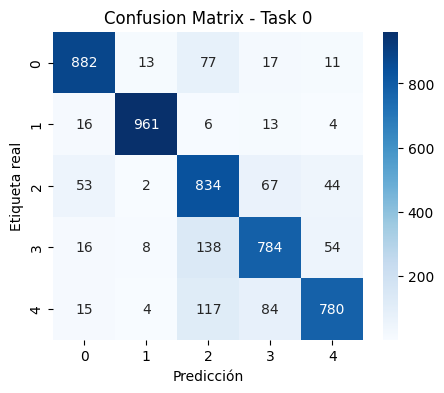

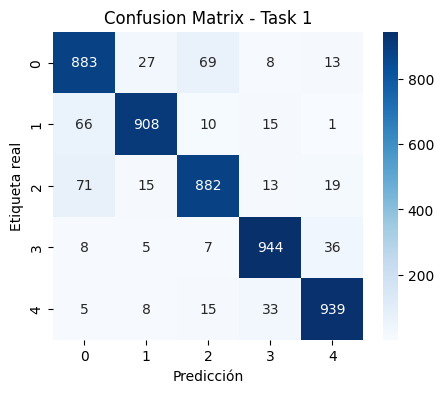

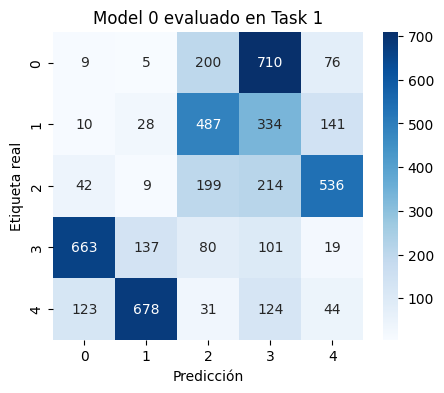

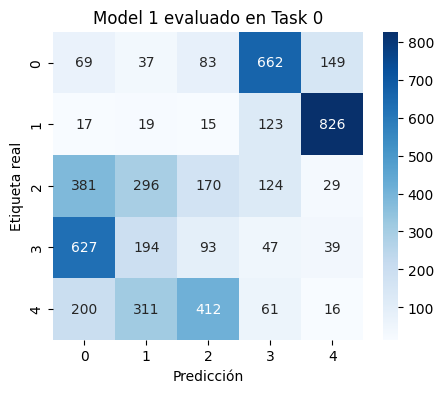

In [9]:
# Continual_Learning_Evaluation.ipynb

import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Cargar métricas globales
with open("metrics.json", "r") as f:
    metrics = json.load(f)

print("📊 Métricas registradas por tarea:")
for task_data in metrics:
    print(f"Tarea {task_data['task']}: Accuracy = {task_data['accuracy']:.4f}")

# Mostrar matrices de confusión por tarea
def plot_confusion_matrix(path, title):
    df = pd.read_csv(path, index_col=0)
    plt.figure(figsize=(5, 4))
    sns.heatmap(df, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta real")
    plt.show()

plot_confusion_matrix("confmat_task0.csv", "Confusion Matrix - Task 0")
plot_confusion_matrix("confmat_task1.csv", "Confusion Matrix - Task 1")
# Nuevas matrices de confusión cruzadas

plot_confusion_matrix("confmat_model0_on_task1.csv", 
                      "Model 0 evaluado en Task 1")

plot_confusion_matrix("confmat_model1_on_task0.csv", 
                      "Model 1 evaluado en Task 0")





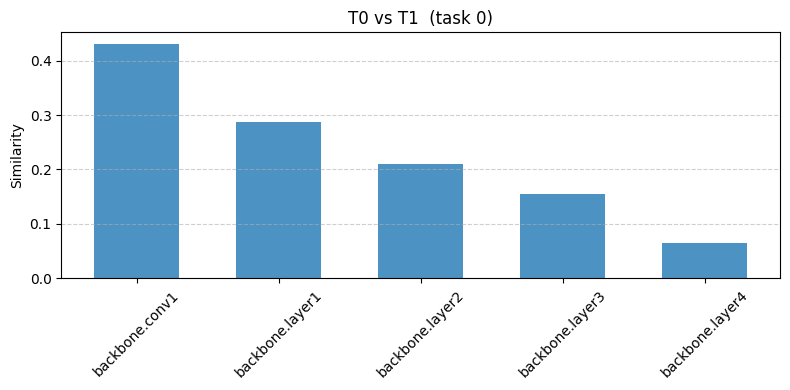

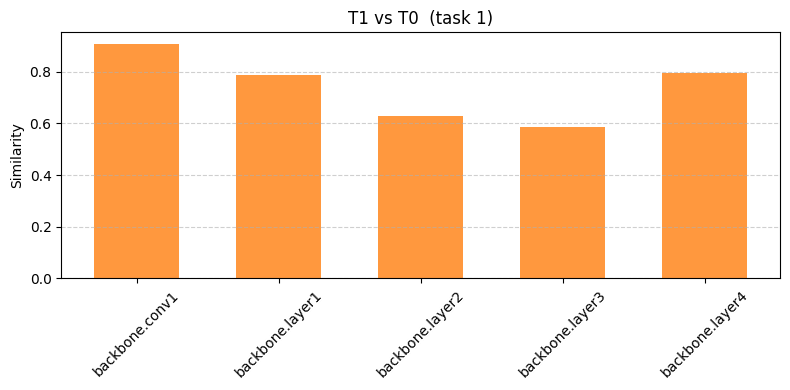

In [8]:
import json
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- 1. Cargar los archivos ----------
with open("sim_finetune_t0v1_task0.json") as f1, open("sim_finetune_t1_0v1.json") as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

layers = list(data1["layers"].keys())
values1 = list(data1["layers"].values())
values2 = list(data2["layers"].values())
x = range(len(layers))

# ---------- 2. Gráfico 1 ----------
plt.figure(figsize=(8, 4))
plt.bar(x, values1, alpha=0.8, width=0.6, color="tab:blue")
plt.xticks(x, layers, rotation=45)
plt.ylabel("Similarity")
plt.title("T0 vs T1  (task 0)")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# ---------- 3. Gráfico 2 ----------
plt.figure(figsize=(8, 4))
plt.bar(x, values2, alpha=0.8, width=0.6, color="tab:orange")
plt.xticks(x, layers, rotation=45)
plt.ylabel("Similarity")
plt.title("T1 vs T0  (task 1)")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


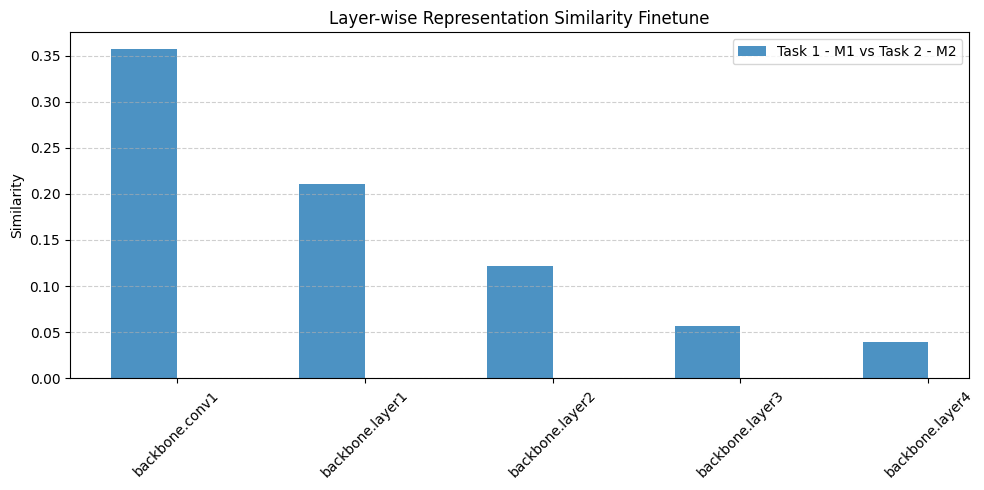

In [7]:
import json
import matplotlib.pyplot as plt

# Cargar archivos JSON
with open("sim_ft_cross_t0ck0_vs_t1ck1.json") as f1:
    data1 = json.load(f1)

# Extraer valores por capa
layers = list(data1["layers"].keys())
values1 = list(data1["layers"].values())

# Crear gráfico
x = range(len(layers))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], values1, width=width, label="Task 1 - M1 vs Task 2 - M2", alpha=0.8)

plt.xticks(x, layers, rotation=45)
plt.ylabel("Similarity")
plt.title("Layer-wise Representation Similarity Finetune")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


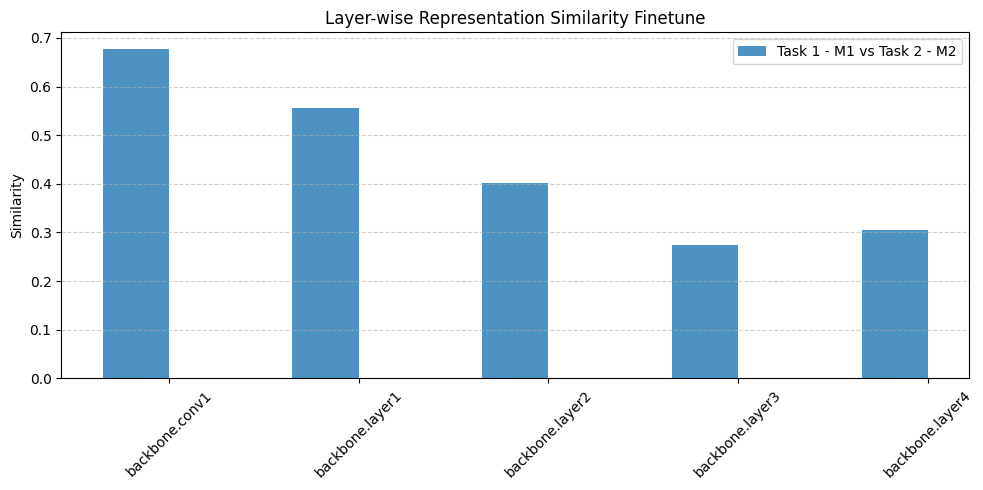

In [10]:
import json
import matplotlib.pyplot as plt

# Cargar archivos JSON
with open("sim_ft_cross_t0ck1_vs_t1ck1.json") as f1:
    data1 = json.load(f1)

# Extraer valores por capa
layers = list(data1["layers"].keys())
values1 = list(data1["layers"].values())

# Crear gráfico
x = range(len(layers))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], values1, width=width, label="Task 1 - M1 vs Task 2 - M2", alpha=0.8)

plt.xticks(x, layers, rotation=45)
plt.ylabel("Similarity")
plt.title("Layer-wise Representation Similarity Finetune")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


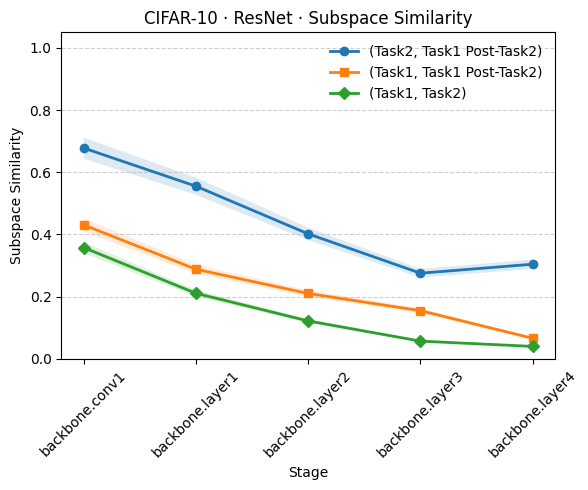

In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np

# ────────────────────────────────────────────────────────
# 1. Archivos JSON  ➜  etiqueta para la leyenda
#    (usa el nombre exacto que tengas en disco)
# ────────────────────────────────────────────────────────
files = {
    "(Task2, Task1 Post-Task2)":     "sim_ft_cross_t0ck1_vs_t1ck1.json",
    "(Task1, Task1 Post-Task2)":                "sim_finetune_t0v1_task0.json",
    "(Task1, Task2)":     "sim_ft_cross_t0ck0_vs_t1ck1.json",
}

# ────────────────────────────────────────────────────────
# 2. Cargar datos y fijar orden de capas
# ────────────────────────────────────────────────────────
layers, curves = None, {}
for label, path in files.items():
    with open(path) as f:
        data = json.load(f)
    if layers is None:
        layers = list(data["layers"].keys())          # se toma el orden del primero
    curves[label] = [data["layers"][k] for k in layers]

x = np.arange(len(layers))                            # 0, 1, 2, …

# ────────────────────────────────────────────────────────
# 3. Dibujar
# ────────────────────────────────────────────────────────
plt.figure(figsize=(6, 5))
markers = ["o", "s", "D"]                             # un marcador distinto por curva

for (label, y_vals), marker in zip(curves.items(), markers):
    plt.plot(x, y_vals, marker=marker, lw=2, label=label)
    # banda de ±5 % solo para la estética (puedes quitarla si no la quieres)
    y_arr = np.array(y_vals)
    plt.fill_between(x, y_arr * 0.95, y_arr * 1.05, alpha=0.15)

plt.xticks(x, layers, rotation=45)
plt.ylim(0, 1.05)
plt.xlabel("Stage")
plt.ylabel("Subspace Similarity")
plt.title("CIFAR-10 · ResNet · Subspace Similarity")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


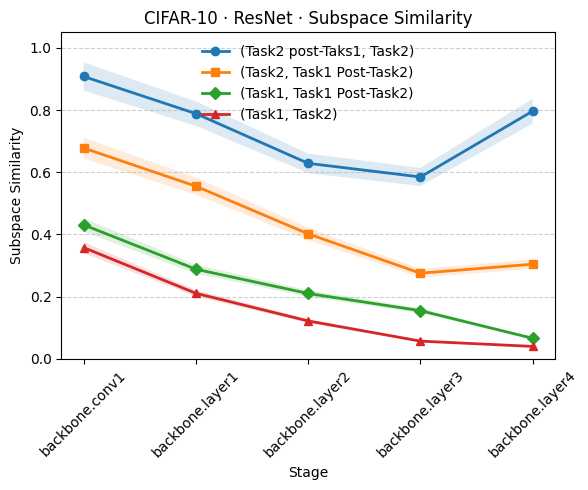

In [20]:
import json
import matplotlib.pyplot as plt
import numpy as np

# ────────────────────────────────────────────────────────
# 1. Archivos JSON  ➜  etiqueta para la leyenda
#    (usa el nombre exacto que tengas en disco)
# ────────────────────────────────────────────────────────
files = {
    "(Task2 post-Taks1, Task2)":     "sim_finetune_t1_0v1.json",
    "(Task2, Task1 Post-Task2)":     "sim_ft_cross_t0ck1_vs_t1ck1.json",
    "(Task1, Task1 Post-Task2)":                "sim_finetune_t0v1_task0.json",
    "(Task1, Task2)":     "sim_ft_cross_t0ck0_vs_t1ck1.json",
}

# ────────────────────────────────────────────────────────
# 2. Cargar datos y fijar orden de capas
# ────────────────────────────────────────────────────────
layers, curves = None, {}
for label, path in files.items():
    with open(path) as f:
        data = json.load(f)
    if layers is None:
        layers = list(data["layers"].keys())          # se toma el orden del primero
    curves[label] = [data["layers"][k] for k in layers]

x = np.arange(len(layers))                            # 0, 1, 2, …

# ────────────────────────────────────────────────────────
# 3. Dibujar
# ────────────────────────────────────────────────────────
plt.figure(figsize=(6, 5))
markers = ["o", "s", "D", "^"]        # 4 marcadores  ⇒  se dibujarán las 4 curvas
                             # un marcador distinto por curva

for (label, y_vals), marker in zip(curves.items(), markers):
    plt.plot(x, y_vals, marker=marker, lw=2, label=label)
    # banda de ±5 % solo para la estética (puedes quitarla si no la quieres)
    y_arr = np.array(y_vals)
    plt.fill_between(x, y_arr * 0.95, y_arr * 1.05, alpha=0.15)

plt.xticks(x, layers, rotation=45)
plt.ylim(0, 1.05)
plt.xlabel("Stage")
plt.ylabel("Subspace Similarity")
plt.title("CIFAR-10 · ResNet · Subspace Similarity")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()
